# Data analysis template

This notebook shows how to read the output of the simulation in a pandas Dataframe. 


In [5]:
# Imports for HDF5 I/O, analysis and plotting
import h5py
import json
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

In [6]:
# Useful functions to read the output of the simulations

def read_stats_df(stats_path: Path) -> pd.DataFrame:
    # Read stats.h5 into a tidy DataFrame using stored fieldnames
    with h5py.File(stats_path, "r", swmr=True) as fh:
        dset = fh["stats"]
        dset.refresh()
        fieldnames = [s.decode("utf-8") for s in dset.attrs["fieldnames"]]
        return pd.DataFrame(dset[...], columns=fieldnames)

def read_state_df(state_path: Path) -> pd.DataFrame:
    # Read state.h5 into a DataFrame; each column is one agent state
    with h5py.File(state_path, "r", swmr=True) as fh:
        dset_state = fh["state"]
        dset_time = fh["time"]
        dset_step = fh["step"]
        dset_state.refresh()
        dset_time.refresh()
        dset_step.refresh()
        state = dset_state[...]
        df = pd.DataFrame(state, columns=[f"x_{i}" for i in range(state.shape[1])])
        df.insert(0, "t", dset_time[...])
        df.insert(0, "step", dset_step[...])
        return df

def read_timings(timings_path: Path) -> dict:
    return json.loads(Path(timings_path).read_text())

def read_config(config_path: Path) -> dict:
    return json.loads(Path(config_path).read_text())

Below we read the output of the simulations


In [7]:
results_dir = Path("./") # set the path of the directory where the output is

# Load outputs produced by the simulation
stats_df = read_stats_df(results_dir / "stats.h5")
state_df = read_state_df(results_dir / "state.h5")
parameters = read_config(results_dir / "config_used.json")
timings = read_timings(results_dir / "timings.json")

In [8]:
stats_df.head()

,step,t,order_param,phase_var
0,0.0,0.0,0.020608,3.217810
1,10.0,1.0,0.019186,3.229225
2,20.0,2.0,0.021255,3.240925
3,30.0,3.0,0.024127,3.244668
4,40.0,4.0,0.023279,3.261089


In [9]:
state_df.head()

,step,t,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_990,x_991,x_992,x_993,x_994,x_995,x_996,x_997,x_998,x_999
0,0,0.0,2.420976,4.573918,0.799393,5.190437,1.735861,0.061475,0.842960,5.888568,...,2.268705,5.242257,5.238417,2.585750,4.286633,0.226298,5.071229,0.413195,3.883913,1.643988
1,10,1.0,2.408091,4.561518,0.962224,5.187170,1.709743,0.198295,0.726274,5.752935,...,2.518546,4.986556,5.349931,2.677363,4.308924,0.066815,5.162043,0.447799,3.928376,1.663707
2,20,2.0,2.258832,4.650193,0.941377,5.217363,1.623056,0.149537,0.707126,5.580301,...,2.534004,5.035959,5.278445,2.626830,4.482976,0.193242,5.146440,0.340277,3.842285,1.659127
3,30,3.0,2.235298,4.603549,0.857026,5.149764,1.705575,0.138009,0.796788,5.668178,...,2.492575,5.015803,5.237755,2.677853,4.377977,0.193399,5.161461,0.342785,3.798643,1.447018
4,40,4.0,2.252997,4.518117,0.849847,5.175180,1.628366,0.101573,0.778182,5.615765,...,2.554221,4.969508,5.152301,2.763817,4.346232,0.119330,5.249019,0.399647,3.825090,1.394451


Sample plots: statistics over time and empirical measure at a given time

Text(0, 0.5, 'count')

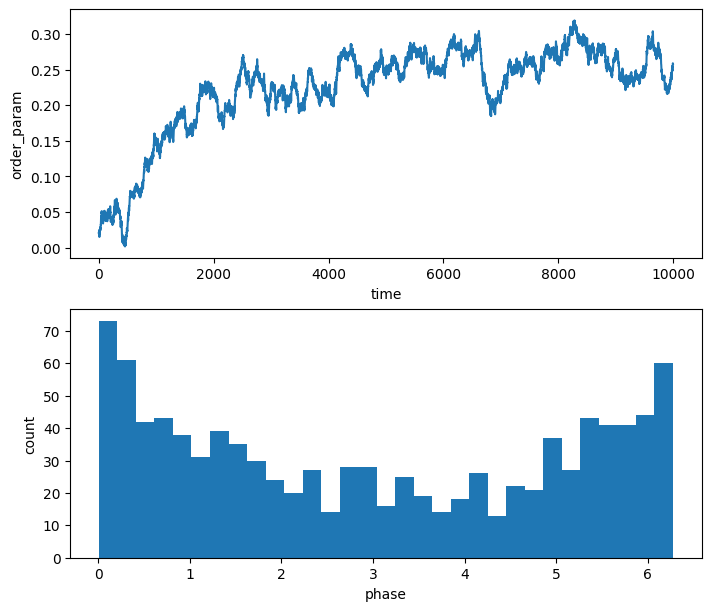

In [10]:
# Plot order parameter over time
fig, ax = plt.subplots(2, 1, figsize=(7, 6), constrained_layout=True)
stats_df.plot(x="t", y="order_param", ax=ax[0], legend=False)
ax[0].set_xlabel("time")
ax[0].set_ylabel("order_param")

# Histogram of phases at the last saved time
last_row = state_df.iloc[-1]
phase_values = last_row.filter(like="x_").to_numpy()
ax[1].hist(phase_values, bins=int(np.sqrt(phase_values.size)))
ax[1].set_xlabel("phase")
ax[1].set_ylabel("count")
